In [24]:
#1. extract data and read the file

%matplotlib inline
import pylab as pl
import numpy as np
import pandas as pd

X = []
samples_x = []

f = open("genotypes.csv","r")

#strip samples_ids
for line in f:
    sv = line.strip().split(",")
    samples_x.append(sv[0])
    
    row = []
    for element in sv[1:]:
        row.append(str(element))
    X.append(row)
    
f.close()

X = np.array(X)
samples_x = np.array(samples_x)

f.close()

#X.shape

print(X)


[['1_10904' '1_61822' '1_156628' ... '5_26922046' '5_26924854'
  '5_26957850']
 ['G' 'G' 'G' ... '?' 'T' 'A']
 ['G' 'G' 'G' ... 'A' 'T' 'A']
 ...
 ['G' 'A' 'G' ... 'T' 'T' 'A']
 ['G' 'G' 'A' ... 'A' 'T' 'A']
 ['G' 'G' 'G' ... 'A' 'T' 'C']]


# data-preprocessing

In [25]:
%matplotlib inline
import pylab as pl
import numpy as np
from sklearn.impute import SimpleImputer

print("No Samples:\t%d" % X.shape[0])
print("No Features:\t%d" % X.shape[1])
print()

X = pd.read_csv("genotypes.csv", delimiter=",")
y = pd.read_csv("phenotype_values.csv", delimiter=",")

E = pd.merge(X,y)

X = E.loc[:,"1_10904":"5_26957850"]
y = E.loc[:,"phenotype_values"]
y = y.to_numpy()

Xr = X.replace(['?'],[100])

imputer = SimpleImputer(missing_values=100,strategy='most_frequent')
Xmf = imputer.fit_transform(Xr)

print(Xr)
print(Xmf)
#need to change to 0 and 2 


#convert string to float
Xdf = pd.DataFrame(Xmf)
for col in Xdf.columns:
    val = Xdf[col].max()
    Xdf[col]=np.where(Xdf[col]==val,0,2)
Xdf = Xdf.to_numpy()

print(Xdf)


No Samples:	1827
No Features:	5000

     1_10904 1_61822 1_156628 1_191062 1_208851 1_280584 1_284187 1_395787  \
0          G       G        G        C        G        C        C        T   
1          G       G        G        C        G        C        C        T   
2          A       G        A        T        G        C        C        A   
3          G       G        G        C        G        C        T        A   
4          G       G        G        C        G        C      100        T   
...      ...     ...      ...      ...      ...      ...      ...      ...   
1821       G       G        G        C        G        C        C        A   
1822     100       G        G        C        G        C      100        A   
1823       G       A        G      100        G        C        C        A   
1824       G       G        A        C        G        C        C        A   
1825       G       G        G        C      100        T        C        A   

     1_416711 1_418329  ...

# dimensionality reduction(PCA analysis)

In [37]:
#standardise the data
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
Xn = scaler.fit_transform(Xdf)

#compute the covariance matrix on the standardised data
n = Xn.shape[0]
C = 1/(n-1) * np.dot(Xn.T,Xn)

#eigendecompose the matrix  𝐂  into its eigenvalues and eigenvector
import numpy.linalg as linalg
d, V = linalg.eig(C)

#sort the eigenvalues in decreasing order, re-sort the columns of the eigenvector matrix 𝑉  using the indices from the sorting of the eigenvalues
ind = np.argsort(d)[::-1]
d = d[ind]
V = V[:,ind]

Xn1 = np.dot(Xn,V[:,0:1000])
Xn2 = np.array(Xn1,dtype=float)
print(Xn2)

#calculate how much of the total variance the PCs account for
ratios_variance_explained = d/d.sum()
va = ratios_variance_explained[0:1000].sum()


print("First 1000 PCs account for %.2f %% of the total variance!" % (va*100))



[[-8.68376349e+00 -5.60131328e+00  9.34610142e+00 ...  7.62645725e-01
  -3.91271658e-01  4.47480771e-01]
 [-9.09791484e+00  2.01712253e+00  5.23998996e+00 ...  8.30489368e-01
   1.62805750e+00  9.43439444e-02]
 [ 4.01402629e+01 -1.81938059e+01 -7.44733592e+00 ...  1.54980833e+00
  -1.75373738e-02  3.79840819e-01]
 ...
 [ 3.36663967e+01  6.91548467e+00  2.93889646e+00 ...  1.65162263e+00
  -2.26837294e+00 -5.47490890e-01]
 [-7.26679778e+00  3.66994226e+00  5.88215878e+00 ... -1.91928172e+00
  -1.31333746e+00 -1.05577672e+00]
 [-9.36925283e+00  9.02793145e+00 -3.59236321e+00 ...  1.41718784e-01
   1.16382330e+00  1.65280364e-01]]
First 1000 PCs account for 90.89 % of the total variance!


C:\Users\zhang\AppData\Local\Temp/ipykernel_9504/343133308.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  Xn2 = np.array(Xn1,dtype=float)
C:\Users\zhang\AppData\Local\Temp/ipykernel_9504/343133308.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  print("First 1000 PCs account for %.2f %% of the total variance!" % (va*100))


C:\Users\zhang\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


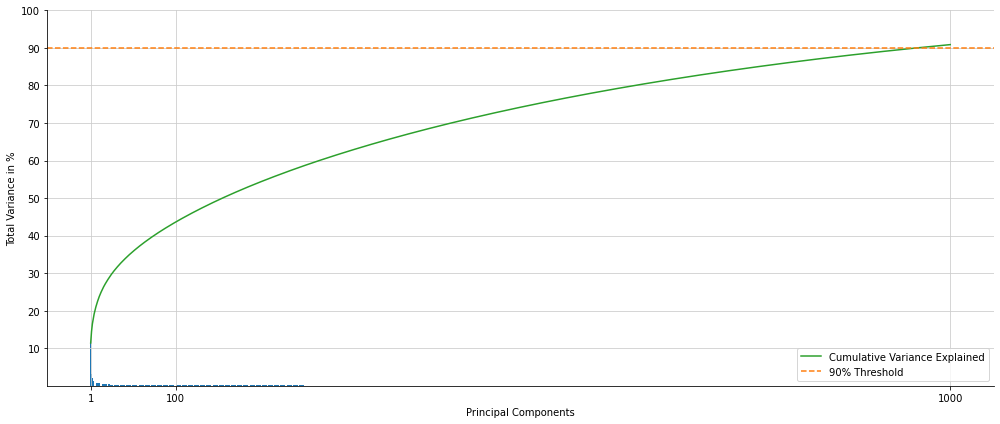

In [62]:
#importing required libraries
import pylab as pl
import numpy as np

pl.figure(figsize=(14,6))

#plot variance for the first 1000 features
n=1000

ax = pl.subplot(111)
ax.bar(np.arange(1,1+len(ratios_variance_explained[0:1000])),ratios_variance_explained[0:1000]*100)
ax.plot(np.arange(1,1+len(ratios_variance_explained[0:1000])), np.cumsum(ratios_variance_explained[0:1000])*100,color="tab:green", label="Cumulative Variance Explained")
ax.set_xticks([1,100,1000])
ax.set_yticks([10,20,30,40,50,60,70,80,90,100])
pl.axhline(90,color="tab:orange",linestyle="dashed",label="90% Threshold")

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Principal Components")
ax.set_ylabel("Total Variance in %")
pl.legend()
pl.tight_layout()

import matplotlib.pyplot as plt
plt.savefig('PCA.png')




C:\Users\zhang\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


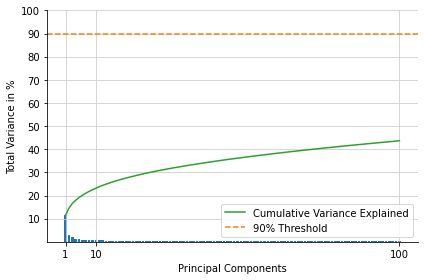

In [63]:


#plot variance for the first 100 features(zoomed in)
n=100

ax = pl.subplot(111)
ax.bar(np.arange(1,1+len(ratios_variance_explained[0:100])),ratios_variance_explained[0:100]*100)
ax.plot(np.arange(1,1+len(ratios_variance_explained[0:100])), np.cumsum(ratios_variance_explained[0:100])*100,color="tab:green", label="Cumulative Variance Explained")
ax.set_xticks([1,10,100])
ax.set_yticks([10,20,30,40,50,60,70,80,90,100])
pl.axhline(90,color="tab:orange",linestyle="dashed",label="90% Threshold")

ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Principal Components")
ax.set_ylabel("Total Variance in %")
pl.legend()
pl.tight_layout()

import matplotlib.pyplot as plt
plt.savefig('PCA_100.png')

In [31]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Split data into train and test
Xn2_train, Xn2_test, y_train, y_test = train_test_split(Xn2,y, test_size=0.2)

print("Full Data:\t" + str(Xn2.shape))
print("Train Data:\t" + str(Xn2_train.shape))
print("Test Data:\t" + str(Xn2_test.shape))

Full Data:	(1826, 1000)
Train Data:	(1460, 1000)
Test Data:	(366, 1000)


from sklearn import decomposition

pca = decomposition.PCA()
pca.n_components = 500
pca_data = pca.fit_transform(Xdf_train)
pca_data

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto')
knn_classifier.fit(pca_data, y_train)
knn_classifier.score(pca.transform(Xdf_test), y_test)

In [33]:
from sklearn import linear_model
model3=linear_model.ElasticNet(alpha=0.1,l1_ratio=0.1,max_iter=7000)
model3.fit(Xn2_train, y_train)
predictions_training = model3.predict(Xn2_train)
predictions_testing = model3.predict(Xn2_test)

print("MSE (Train):\t%.2f" % metrics.mean_squared_error(y_train, predictions_training))
print("R2 (Train):\t%.2f" % metrics.r2_score(y_train, predictions_training))
print("MSE (Test):\t%.2f" % metrics.mean_squared_error(y_test, predictions_testing))
print("R2 (Test):\t%.2f" % metrics.r2_score(y_test, predictions_testing))

#print(model1.intercept_,model1.coef_)
#print(model2.intercept_,model2.coef_)
print(model3.intercept_,model3.coef_.size,model3.coef_)
print(Xn2)

MSE (Train):	0.80
R2 (Train):	0.92
MSE (Test):	6.25
R2 (Test):	0.46
54.57981740375593 1000 [ 7.74726666e-02 -1.28903627e-02 -1.13951998e-02  3.16683551e-02
  2.64953650e-03  2.04215503e-02 -2.75116262e-02  1.20256282e-02
  4.54475920e-02 -6.22444693e-02  5.08253787e-02 -3.55453920e-02
  1.01632482e-03 -2.40156695e-03 -1.14826710e-03 -2.28675768e-02
 -1.47584397e-02  7.65470232e-02 -4.25948896e-02 -4.61967000e-03
  2.56308106e-02  7.28708480e-02 -4.10531069e-02 -2.66348571e-02
  3.19450792e-02  2.31035804e-02 -2.07018455e-02  1.96198339e-02
  4.77069067e-02 -3.17758386e-02 -6.01576468e-02  4.20886628e-02
 -3.28093149e-02 -1.32181288e-02  2.26217022e-03  3.48515169e-02
  1.12459083e-02  3.52106185e-02 -4.63229180e-02  2.62144299e-02
 -1.40983689e-02  4.31823633e-02  0.00000000e+00 -3.26133265e-02
 -2.92912171e-02 -1.92767685e-02  4.00769493e-02  5.53406850e-02
  4.62443190e-02 -4.67204159e-02 -4.13723614e-02  5.53276939e-02
 -5.85480985e-02  2.84530489e-02 -3.10263238e-02 -3.47408441e-02

In [67]:
from sklearn import linear_model
model2=linear_model.Ridge(alpha=3000)
model2.fit(Xn2_train, y_train)
predictions_training = model2.predict(Xn2_train)
predictions_testing = model2.predict(Xn2_test)

print("MSE (Train):\t%.2f" % metrics.mean_squared_error(y_train, predictions_training))
print("R2 (Train):\t%.2f" % metrics.r2_score(y_train, predictions_training))
print("MSE (Test):\t%.2f" % metrics.mean_squared_error(y_test, predictions_testing))
print("R2 (Test):\t%.2f" % metrics.r2_score(y_test, predictions_testing))

MSE (Train):	1.56
R2 (Train):	0.84
MSE (Test):	4.73
R2 (Test):	0.59
